In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom
import seaborn as sns
import pandas as pd

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [2]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100
steps = 100

In [3]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(N_inp, N_bar, num_states, steps=steps)

In [4]:
cache_states = [0, 30, 60]

# Run Task (with learning)

In [5]:
model.reset()
cache_acts = []
cache_acts_over_time = []

for cache_state in cache_states:
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])
    cache_acts.append(acts.copy())
    cache_acts_over_time.append(acts_over_time.copy())

Now I just cached at location: 0
Now I just cached at location: 30
Now I just cached at location: 60


In [6]:
_, _, output, retrieval_acts_over_time = model.run_recall(0., place_inputs)

In [7]:
_, place_acts, _, _ = model.run_nonrecurrent(place_inputs)
place_mean = np.mean(place_acts, axis=0).flatten()
place_std = np.std(place_acts, axis=0).flatten()

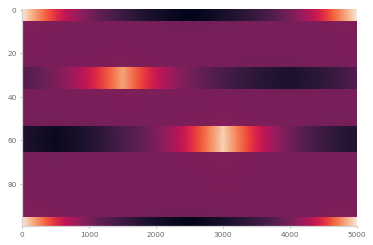

In [12]:
plt.figure()
plt.imshow(output[0], aspect='auto')
plt.show()

# Define cache activity as a mean over some time window

In [13]:
avg_cache_acts = []
for i in range(len(cache_states)):
    location = cache_states[i]
    vec = cache_acts_over_time[i][-1, location, :]#.mean(axis=0)
    avg_cache_acts.append(vec)
avg_cache_acts = np.array(avg_cache_acts)

In [14]:
cache_mean = avg_cache_acts.mean(axis=0)

In [15]:
avg_retrieval_acts = []
for i in range(len(cache_states)):
    location = cache_states[i]
    vec = retrieval_acts_over_time[-1, location, :]#.mean(axis=0)
    avg_retrieval_acts.append(vec)
avg_retrieval_acts = np.array(avg_retrieval_acts)

# Individual cell plots

4.443322328745122
10.89191053614586


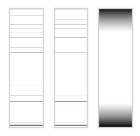

4.342262322536004
10.094094118282248


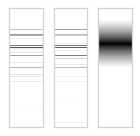

4.024474316957425
11.583865709099927


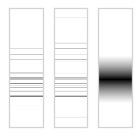

In [22]:
for i in range(3):
    fig, axs = plt.subplots(1, 3, figsize=(2, 2))
    axs[0].imshow(
        avg_cache_acts[i].reshape(-1,1),
        aspect='auto', cmap='binary')
    axs[1].imshow(
        avg_retrieval_acts[i].reshape(-1,1),
        aspect='auto', cmap='binary')
    axs[2].imshow(
        place_acts[cache_states[i]].reshape(-1,1),
        aspect='auto', cmap='binary')
    print(avg_cache_acts[i].max())
    print(avg_retrieval_acts[i].max())
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
    plt.subplots_adjust(wspace=-3, hspace=0)
    plt.tight_layout()
    plt.savefig(f'figures/fig3d_{i}.png', dpi=300, transparent=True)
    plt.show()